# **Multi-Dimensional Scaling**


Estimated time needed: **45** minutes


## Use cases of Multi-Dimensional Scaling

*   Recognizing families of parts in order to design cellular manufacturing systems.
*   Creating groups of products when designing assembly areas.
*   Market research, multi-dimensional scaling is often used to plot data such as the perception of products in an easy to interpret, visual way.

For instance, suppose a realtor has many listings to sell. Each listing has several attributes such as number of bedrooms, number of bathrooms, square feet, etc. You as a Data Scientist, are hired by the realtor to find out the similarities and dissimilarities of the listings, so that the brokers can use this information when providing recommendations for the buyers.

However, since the number of attributes each listing has is bigger than what could be visualized, to have a clearer sense of how different each listing is you would need to reproduce the listing data on a lower dimension.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/realtor.jpeg" width=60%>


Multi-Dimensional Scaling (MDS) is a family of algorithms, one version of which is Principal Component Analysis (PCA). Like PCA, MDS can be used for dimensionality reduction; MDS can also be used to map complex differences into visual space. Additional articles on MDS:   <a href="https://link.springer.com/chapter/10.1007/978-3-642-82580-4_139?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01"> \[1]</a>, <a href="https://www.djsresearch.co.uk/glossary/item/Multi-Dimensional-Scaling?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01"> \[2]</a>

There are several different categories of Multidimensional scaling (MDS). In this lab, we will review  Metric MDS as well as Non-Metric MDS scaling using **scikit-learn** library. For more information on MDS, please see <a href="https://arxiv.org/pdf/2009.08136.pdf?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01"> \[3]</a>.


Steps in MDS analysis:

*   Pre-process and generate training and testing datasets
*   Train and fine-tune logistic regression models
*   Interpret trained logistic regression models
*   Evaluate trained logistic regression models


## **Table of Contents**

<ol>
    <li><a href="https://#Objectives">Objectives</a></li>
    <li><a href="https://#Datasets">Datasets</a></li>
    <li>
        <a href="https://#Setup">Setup</a>
        <ol>
            <li><a href="https://#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="https://#Importing-Required-Libraries">Importing Required Libraries</a></li>
            <li><a href="https://#Defining-Helper-Functions">Defining-Helper-Functions</a></li>
        </ol>
    </li>
    <li>
        <a href="https://#Metric-MDS">Metric MDS</a>
        <ol>
            <li><a href="https://#From-Relative-Location-to-Absolute-Location">From Relative Location to Absolute Location</a></li>
            <li><a href="https://#Example-1">Example 1</a></li>
        </ol>
    </li>
    <li><a href="https://#Non-Metric-MDS">Non-Metric MDS</a></li>
    <li>
        <a href="https://#Dimensionality-reduction-with-MDS">Dimensionality reduction with MDS</a>
        <ol>
            <li><a href="https://#Exercise-1">Exercise 1 </a></li>
        </ol>    
    </li>   
    <li><a href="https://#T-Distributed-Stochastic-Neighbor-Embedding-(optional)">T-Distributed Stochastic Neighbor Embedding (optional)</a></li>
</ol>


***


## Objectives


After completing this lab you will be able to:


*   **Understand** different types of Multi-Dimensional Scaling
*   **Understand** concepts of Metric MDS and Non-Metric MDS, including: embedding space, minimization and Stress
*   **Apply**  Metric-MDS and Non-Metric MDS
*   **Apply** different distance metrics to  Metric MDS and Non-Metric MDS
*   **Apply**  MDS to dimensionality reduction


## Datasets

Datasets for this lab are gathered from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) under the MIT License.


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for mathematical operations.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for visualizing the data.
*   [`scipy`](https://docs.scipy.org/doc/scipy/reference/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for complex numerical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for machine learning and machine-learning-pipeline related functions.


### Installing Required Libraries

The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
#!mamba install -qy pandas==1.3.4 numpy==1.21.4 matplotlib==3.5.0 scikit-learn==0.20.1 scipy==1.7.3
# Note: If your environment doesn't support "!mamba install", use "!pip install"

### Importing Required Libraries


In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean, cityblock, cosine
import sklearn.metrics.pairwise
import seaborn as sns
import folium
# Import matplotlib for 3d plotting:
import matplotlib.pyplot as plt
from sklearn.preprocessing import  MinMaxScaler
from matplotlib import offsetbox
# Make matplotlib work in jupyter notebook
%matplotlib inline

### Defining Helper Functions


This function plots out labeled scatter plots of latitude and longitude data


In [2]:
def plot_points(df,color="red",title=""):

    X=df['lon']
    Y=df['lat']

    annotations=df.index

    plt.figure(figsize=(8,6))
    plt.scatter(X,Y,s=100,color=color)
    plt.title(title)
    plt.xlabel("lat")
    plt.ylabel("log")
    for i, label in enumerate(annotations):
        plt.annotate(label, (X[i], Y[i]))
    plt.axis('equal')
    plt.show()

This function plots out labelled scatter plots of digits dataset in two dimensions  after a Dimensionality reduction:


In [3]:
def plot_embedding(X, title, ax):
    X = MinMaxScaler().fit_transform(X)
    for digit in digits.target_names:
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            s=60,
            color=plt.cm.Dark2(digit),
            alpha=0.425,
            zorder=2,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        imagebox.set(zorder=1)
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

## Metric MDS


Metric MDS  represents points in an embedding space $\boldsymbol{Z}$  by preserving the distances $d\_{i,j}$ distance between $i-th $ and $j-th $ objects. Each distance is given by:


\begin{pmatrix}
d\_{1,1} & d\_{1,2} & \cdots & d\_{1,N} \\\\\\\\
d\_{2,1} & d\_{2,2} & \cdots & d\_{2,N} \\\\\\\\
\vdots & \vdots & & \vdots \\\\\\\\
d\_{N,1} & d\_{N,2} & \cdots & d\_{N,N}
\end{pmatrix}.


For the distance $d\_{i,j}$ between objects $x_i$ and $x_j$,  we find corresponding points $z_i$ and $z_j$ that minimize the cost function called “**Stress**”, which is a residual sum of squares:


$\text{Stress}*D(z\_1,z\_2,...,z_N)=\Biggl(\sum*{i\ne j=1,...,N}\bigl(d\_{ij}-|z_i-z_j|\bigr)^2\Biggr)^{1/2}$


The goal is to find the embeddings   $z_i$ ,$z_j$ whose euclidean distance is most similar to the original $d\_{i,j}$. We will experiment with several different distance metrics for $d\_{i,j}$, and for the embedding space we can use any distance metric $d(z_i,z_j)$.  We will focus on the euclidean distance $d(z_i,z_j)= |z_i-z_j|$. For more check out <a href="https://arxiv.org/pdf/2009.08136.pdf?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01"> \[1]</a>.


### From Relative Location to Absolute  Location


To better understand how MDS works, we would like to find the  position of several cities, given the length of the Relative latitude and longitude. Latitude is an angle that specifies the north–south position of a point on the Earth, which ranges from 0° at the Equator to 90° (North or South) at the poles. Lines of constant latitude, or parallels, run east–west as circles parallel to the equator. Longitude(λ) specifies the east–west position of a point on the Earth's surface, usually denoted by the Greek letter lambda (λ). Meridians (lines running from pole to pole) connect points with the same longitude as show here.


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/images/lat-log.png" width="300" alt="loglat"  />
</center>


Latitude and longitude are calculated by examining celestial bodies' angles, sometimes in combination with time. We can calculate the difference between the angle relatively easily. This is shown in the figure below, where the boat and the city have different angles with the sun:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/images/Screen_Shot_2022-03-01_at_6.26.10_PM.png"  width="600" />
</center>


To make things simpler, we will use angles between the cities. Here is the length of the relative latitude and longitude of several cities $d\_{ij}$.


In [4]:
distance=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/distance.csv').set_index('name')
distance.head(8)


,Buenos Aires,Paris,Melbourne,St Petersbourg,Abidjan,Montreal,Nairobi,Salvador
name,,,,,,,,
Buenos Aires,0.00,83.00,4.00,93.93,39.33,79.52,32.71,21.03
Paris,83.00,0.00,87.00,10.93,43.67,3.48,50.29,61.97
Melbourne,4.00,87.00,0.00,97.93,43.33,83.52,36.71,25.03
St Petersbourg,93.93,10.93,97.93,0.00,54.60,14.41,61.22,72.90
Abidjan,39.33,43.67,43.33,54.60,0.00,40.19,6.62,18.30
Montreal,79.52,3.48,83.52,14.41,40.19,0.00,46.81,58.49
Nairobi,32.71,50.29,36.71,61.22,6.62,46.81,0.00,11.68
Salvador,21.03,61.97,25.03,72.90,18.30,58.49,11.68,0.00


For Multidimensional Scaling in `sklearn`, we import the `MDS` constructor from the `manifold` module:


In [5]:
from sklearn.manifold import MDS

We create an MDS object `embedding` with the following parameters:


`n_components`: Number of dimensions in which to immerse the dissimilarities, default=2

`precomputed`: Pre-computed dissimilarities are passed directly to **fit** and **fit_transform**

`max_iter` : Maximum number of iterations of the <a href='https://scikit-learn.org/stable/modules/generated/sklearn.manifold.smacof.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01'> SMACOF</a> algorithm for a single run, default = 300

`eps`: Relative tolerance with respect to stress at which to declare convergence, default=1e-3


In [6]:
embedding =  MDS(dissimilarity='precomputed',n_components=2,random_state=0,max_iter=300,eps=1e-3)

We apply `fit_transform` to the data from  `distance` array that fits the model and returns the embedded coordinates. The stress is minimized via  <a href='https://scikit-learn.org/stable/modules/generated/sklearn.manifold.smacof.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01'> SMACOF</a>.


In [7]:
X_transformed = embedding.fit_transform(distance)

We then plot the coordinates as an 'X_transformed'  approximation of the longitude and latitude.


In [8]:
df_t=pd.DataFrame(X_transformed , columns=["lon","lat"], index=distance.columns)
df_t.head(8)

,lon,lat
Buenos Aires,-11.186300,-41.802565
Paris,9.513638,38.732017
Melbourne,-9.292359,-46.088042
St Petersbourg,16.549167,47.746633
Abidjan,-1.608445,-3.575219
Montreal,7.328738,35.794751
Nairobi,-3.001616,-10.072240
Salvador,-8.302824,-20.735334


We can also obtain the embeddings using the attribute `embedding_`.


In [9]:
embedding.embedding_

array([[-11.18630004, -41.80256455],
       [  9.5136384 ,  38.73201664],
       [ -9.2923592 , -46.08804169],
       [ 16.54916736,  47.74663293],
       [ -1.60844493,  -3.57521947],
       [  7.3287376 ,  35.79475057],
       [ -3.00161566, -10.07223994],
       [ -8.30282353, -20.7353345 ]])

We can obtain the stress (sum of squared distance of the disparities and the distances for all constrained points).


In [10]:
embedding.stress_

2.4172408009684325

Finally, we will use the pairwise `dissimilarity_matrix_` function.


In [11]:
embedding.dissimilarity_matrix_

array([[ 0.  , 83.  ,  4.  , 93.93, 39.33, 79.52, 32.71, 21.03],
       [83.  ,  0.  , 87.  , 10.93, 43.67,  3.48, 50.29, 61.97],
       [ 4.  , 87.  ,  0.  , 97.93, 43.33, 83.52, 36.71, 25.03],
       [93.93, 10.93, 97.93,  0.  , 54.6 , 14.41, 61.22, 72.9 ],
       [39.33, 43.67, 43.33, 54.6 ,  0.  , 40.19,  6.62, 18.3 ],
       [79.52,  3.48, 83.52, 14.41, 40.19,  0.  , 46.81, 58.49],
       [32.71, 50.29, 36.71, 61.22,  6.62, 46.81,  0.  , 11.68],
       [21.03, 61.97, 25.03, 72.9 , 18.3 , 58.49, 11.68,  0.  ]])

Let’s compare the embeddings  to the longitude and latitude of each city.


In [12]:
# Make a data frame with dots to show on the map
df = pd.DataFrame({
   'lon':[-58, 2, 145, 30.32, -4.03, -73.57, 36.82, -38.5],
   'lat':[-34, 49, -38, 59.93, 5.33, 45.52, -1.29, -12.97],
   'name':['Buenos Aires', 'Paris', 'Melbourne', 'St Petersbourg', 'Abidjan', 'Montreal', 'Nairobi', 'Salvador']})
df=df.set_index('name')
df.head(10)



,lon,lat
name,,
Buenos Aires,-58.00,-34.00
Paris,2.00,49.00
Melbourne,145.00,-38.00
St Petersbourg,30.32,59.93
Abidjan,-4.03,5.33
Montreal,-73.57,45.52
Nairobi,36.82,-1.29
Salvador,-38.50,-12.97


We can compare the embeddings to the original data:


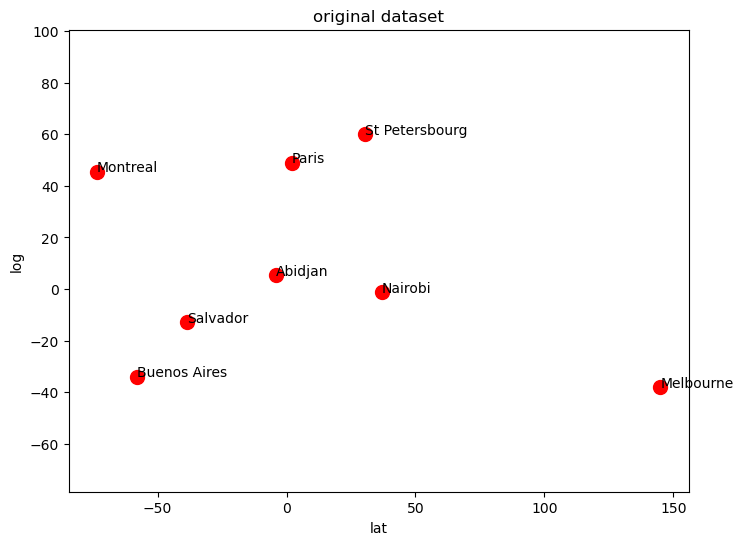

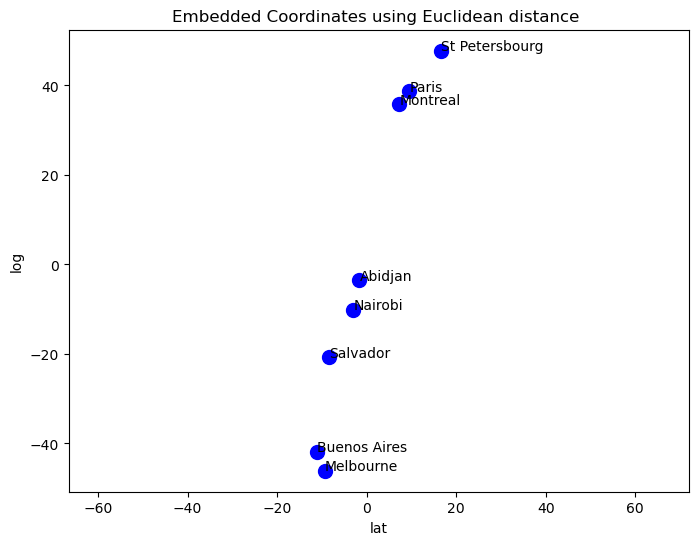

In [13]:
plot_points(df,title='original dataset')

plot_points(df_t,color='blue',title='Embedded Coordinates using Euclidean distance ')

We see the longitude relationship persevered, but the latitude seems to be distorted. This is because MDS preserves the stress relationship between data points. We can verify this by examining the clusters in the embedded coordinates.

By examining the embedded coordinates, we see three groups or clusters. If we examine the distance dataframe, we see these groups are near each other. For example, Melbourne and Buenos Aires have a distance of four, this corresponds to the cluster of the cities at the bottom. Similarly, if you examine the relationship between Paris, St Petersbourg and Montreal, you see they are near each other. The same relation holds for the rest of the other cities.


### Example 1

In this case, we can recreate the distance dataframe using `pdist`. This calculates the Pairwise distances between data points in df. We then apply `squareform` that converts the result to a square-form distance matrix:

$\sqrt{(lon_i-lon_j)^2 + (lat_i-lat_j)^2 }$


In [14]:
from scipy.spatial.distance import squareform, pdist

distance=pd.DataFrame(squareform(pdist(df.iloc[:, 1:])), columns=df.index, index=df.index)

We see MDS clusters on the distance matrix; unlike the principal component analysis, we can apply different distances. In the following  lines of code, we use other distance metrics on the longitude and latitude of different cities, then apply MDS. We plot out the results and see each distance has its own unique property.


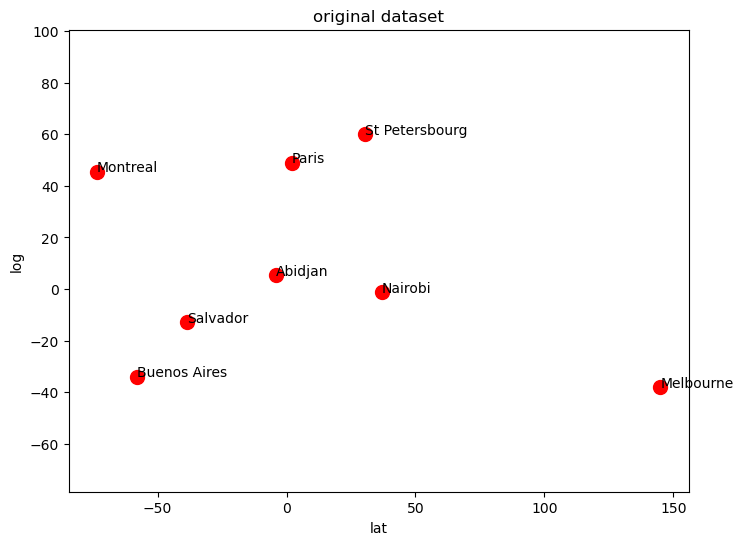

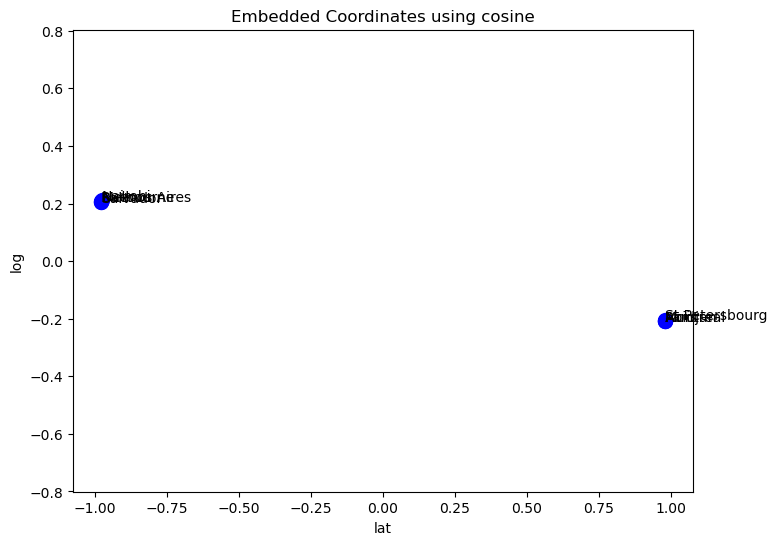

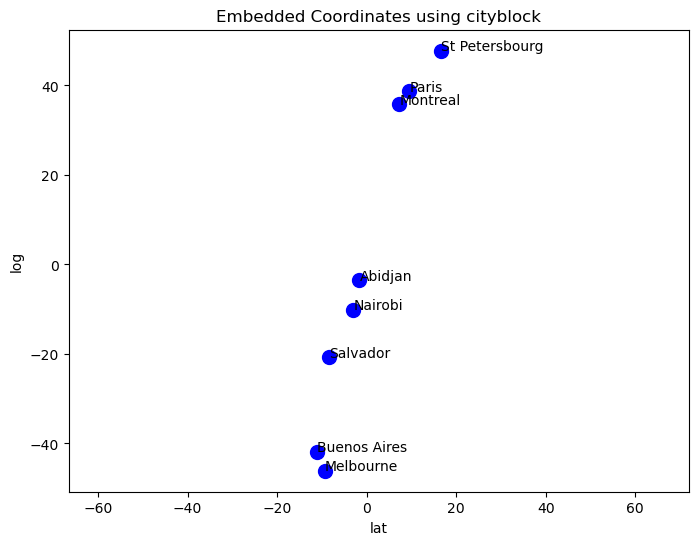

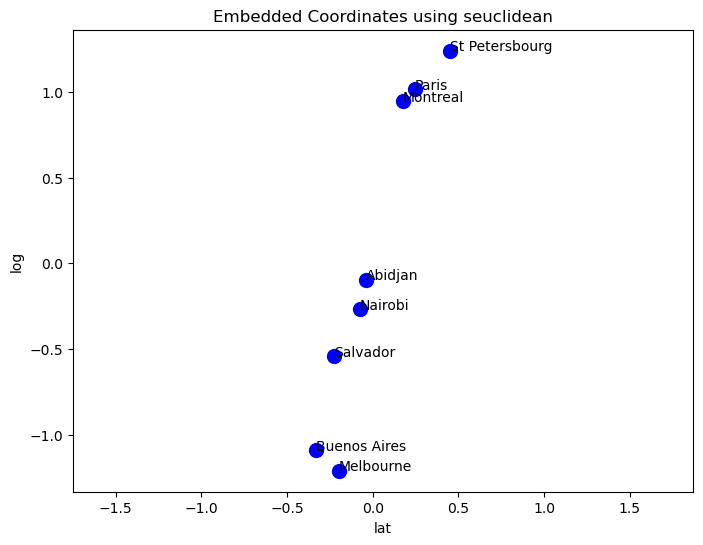

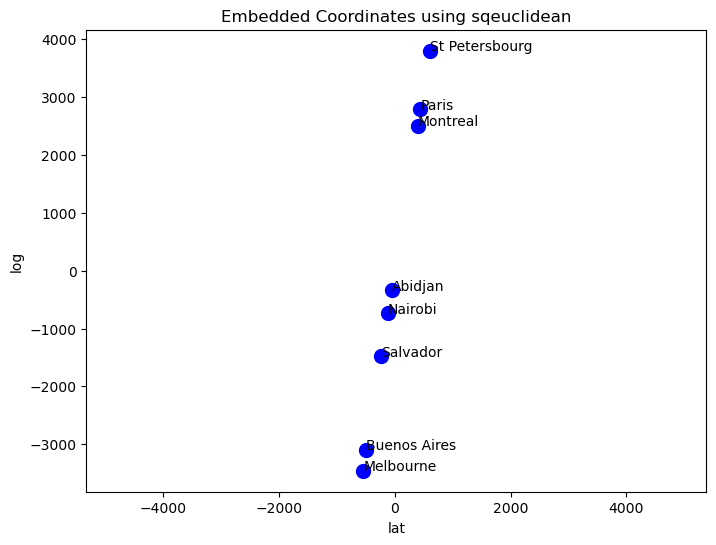

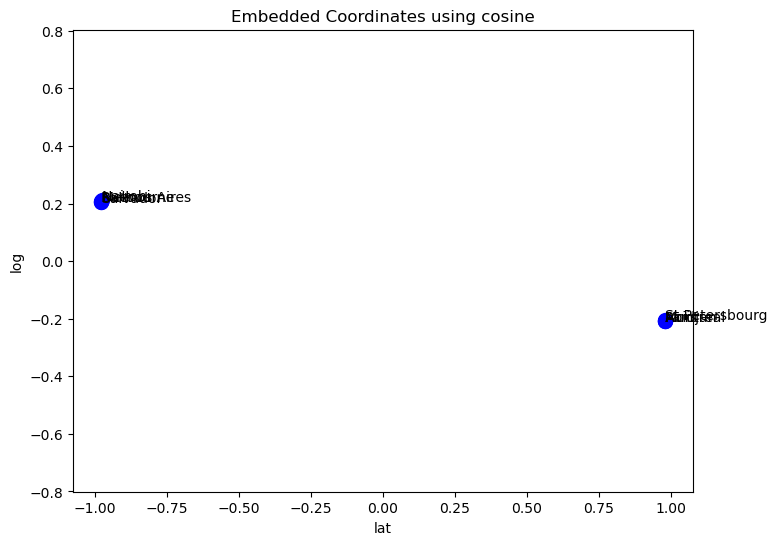

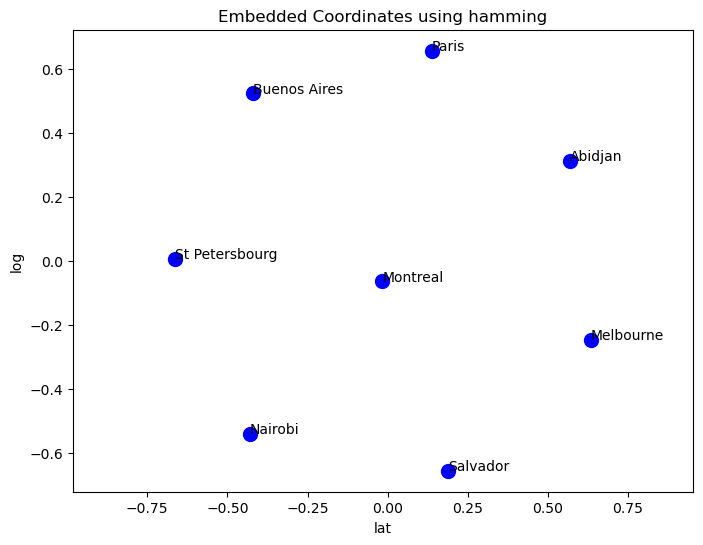

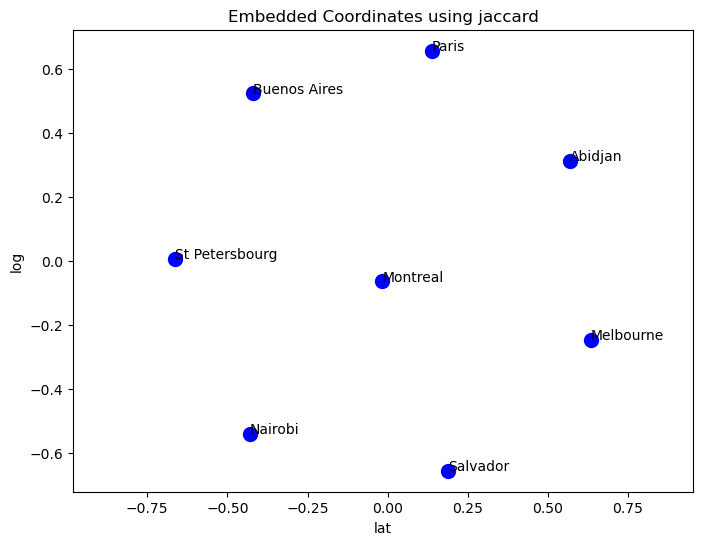

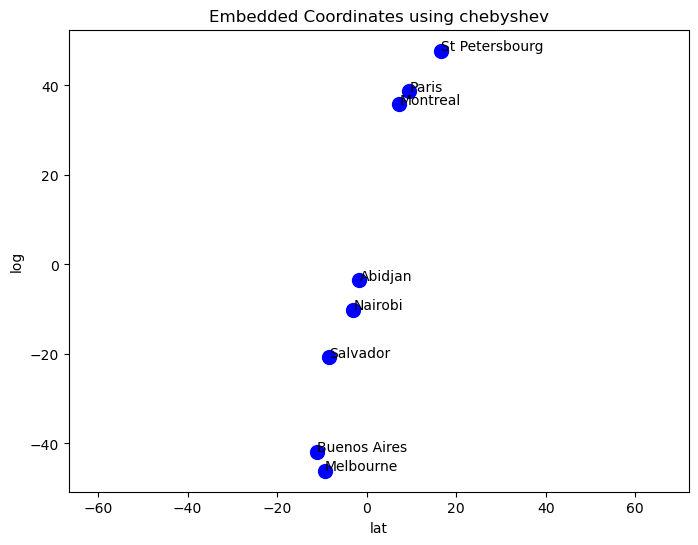

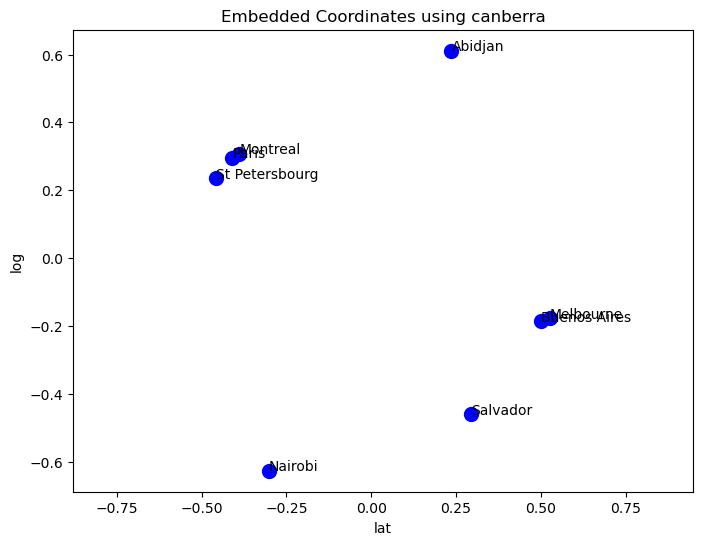

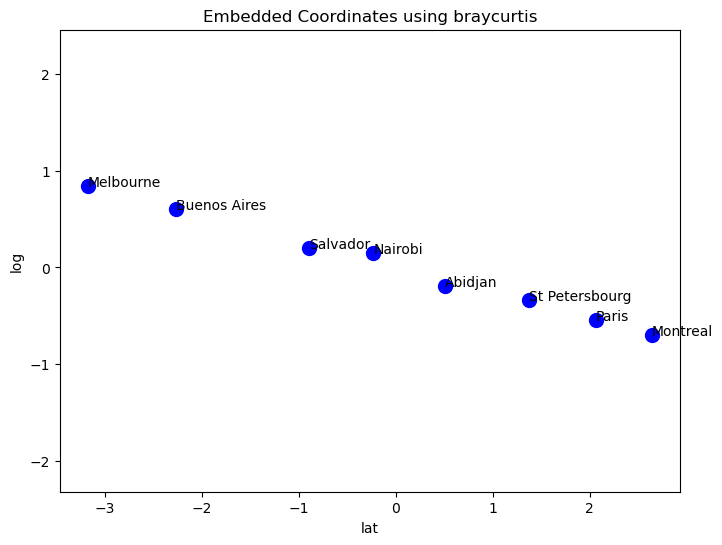

In [15]:
dist=['cosine','cityblock','seuclidean','sqeuclidean','cosine','hamming','jaccard','chebyshev','canberra','braycurtis']
plot_points(df,title='original dataset')
for d in dist:

    distance=pd.DataFrame(squareform(pdist(df.iloc[:, 1:],metric=d)), columns=df.index, index=df.index)

    embedding =  MDS(dissimilarity='precomputed', random_state=0,n_components=2)
    X_transformed = embedding.fit_transform(distance)
    df_t=pd.DataFrame(X_transformed , columns=df.columns, index=df.index)

    plot_points(df_t,title='Embedded Coordinates using '+d ,color='blue')

## Non-Metric MDS


In  Non-Metric MDS, we apply a function $f(.)$, a distance metric, $d(z_i,z_j)$, for the distances between the points in the embedding space.  $f(.)$ is a monotonic function. This means it's always increasing, this preserves the order of the distance. For example, if one distance is larger before applying the function, it will still be larger after applying the function.


$\text{Stress}*D(z\_1,z\_2,...,z_N)=\Biggl(\frac{\sum*{i\ne j=1,...,N}\bigl(f(d(z_i,z_j))-d\_{i,j}\bigr)^2}{\sum d\_{i,j}^2}\Biggl)^{1/2}$


To  perform non-metric MDS , we first set `metric` to False.


In [16]:
metric=False
embedding =  MDS(dissimilarity='precomputed',n_components=2,metric=metric,random_state=0)

We then apply `fit_transform()` to the data from array distance that fits the model and returns the embedded coordinates, and convert it to a dataframe:


In [17]:
X_transformed = embedding.fit_transform(distance)
df_t=pd.DataFrame(X_transformed , columns=df.columns, index=df.index)
df_t.head(8)

,lon,lat
name,,
Buenos Aires,-0.481280,-0.175819
Paris,0.377720,0.183754
Melbourne,-0.445045,-0.220975
St Petersbourg,0.311999,0.261570
Abidjan,0.535899,-0.180281
Montreal,0.374681,0.134138
Nairobi,-0.190865,0.245860
Salvador,-0.501274,-0.277808


Non-metric MDS does better at preserving the horizontal scale, but the cities are negatively scaled in the longitudinal direction. At the same time, some cities like Paris and Montreal seem to have a different relationship  in the latitudinal direction.


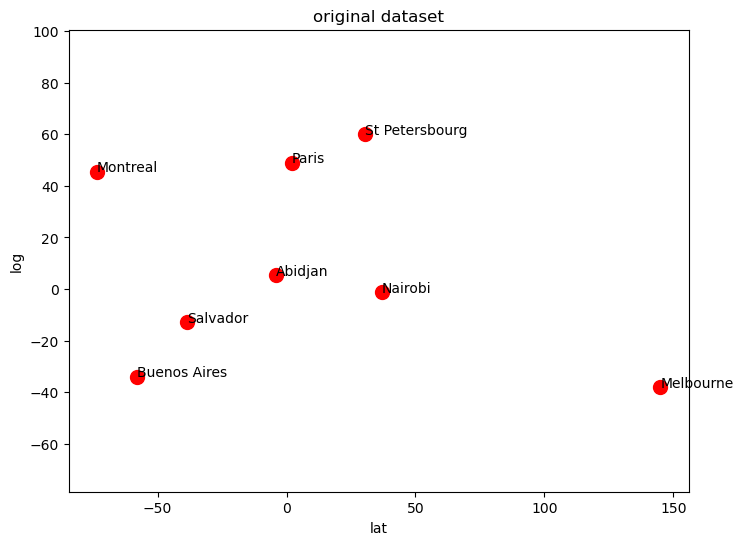

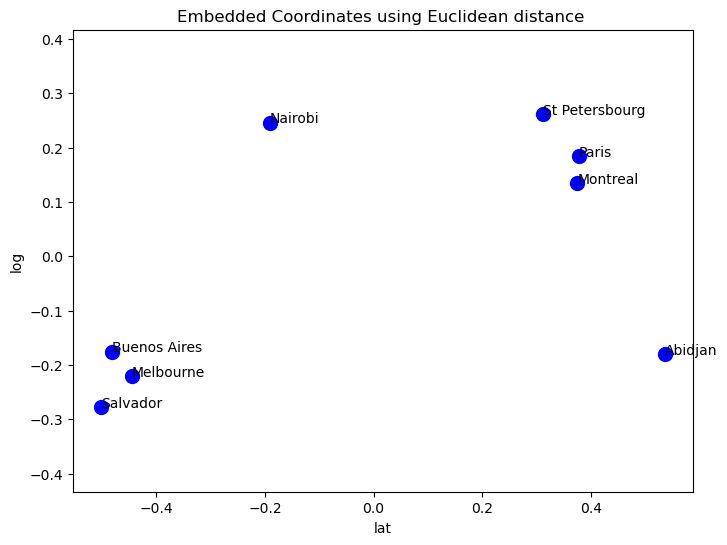

In [18]:
plot_points(df,title='original dataset')

plot_points(df_t,color='blue',title='Embedded Coordinates using Euclidean distance ')

We can also apply different distances to Non-Metric MDS.


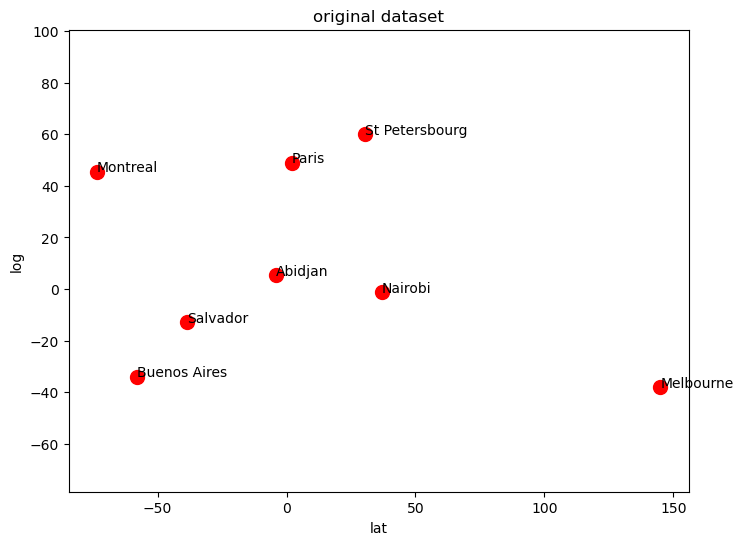

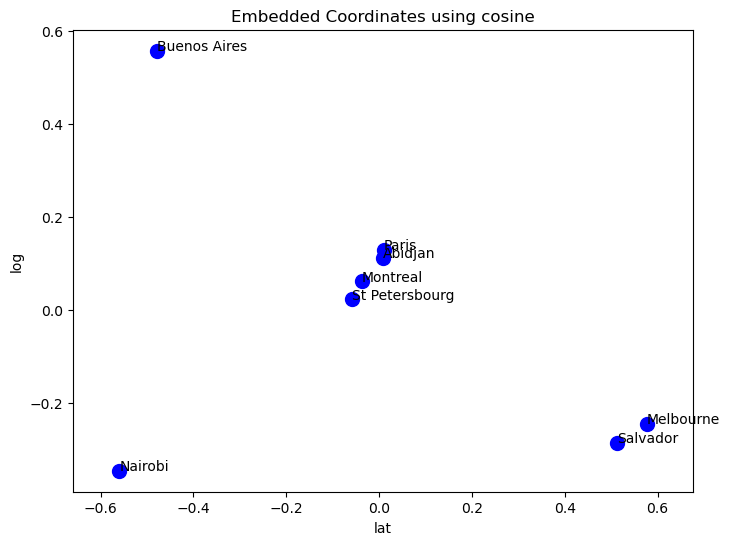

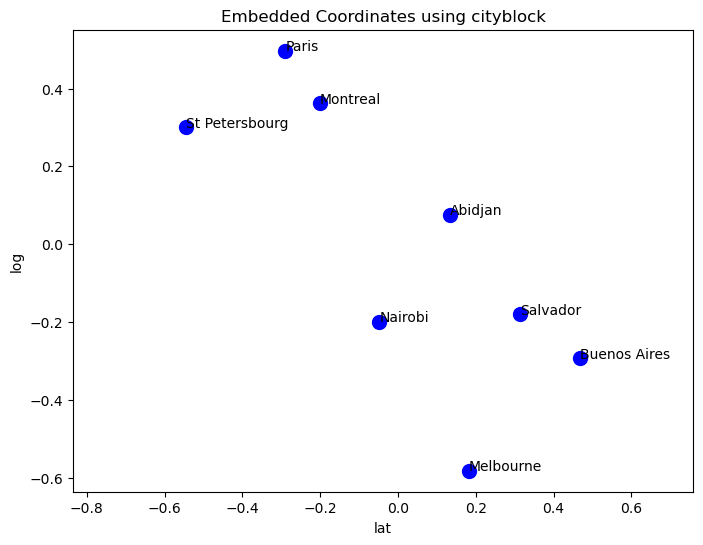

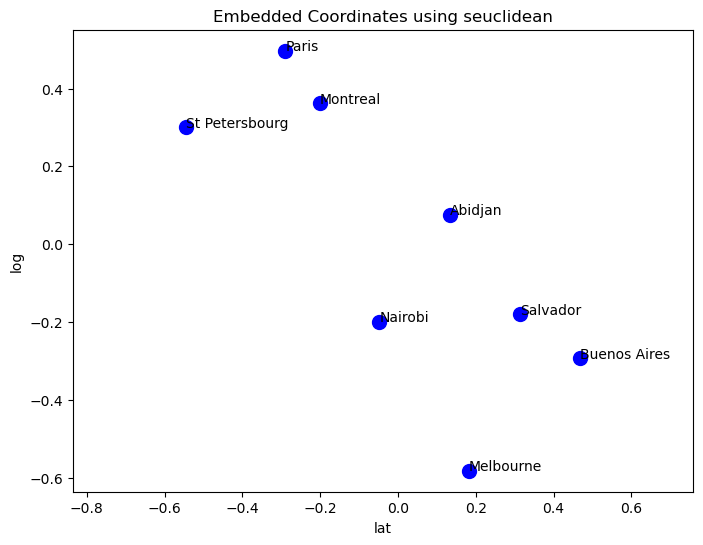

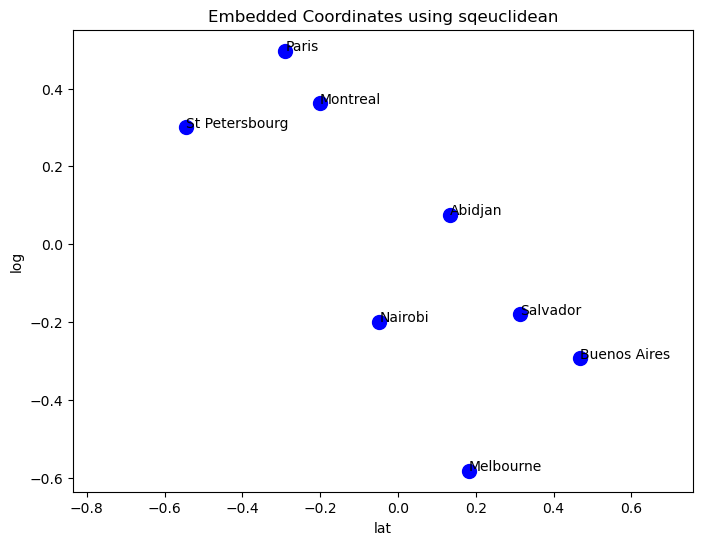

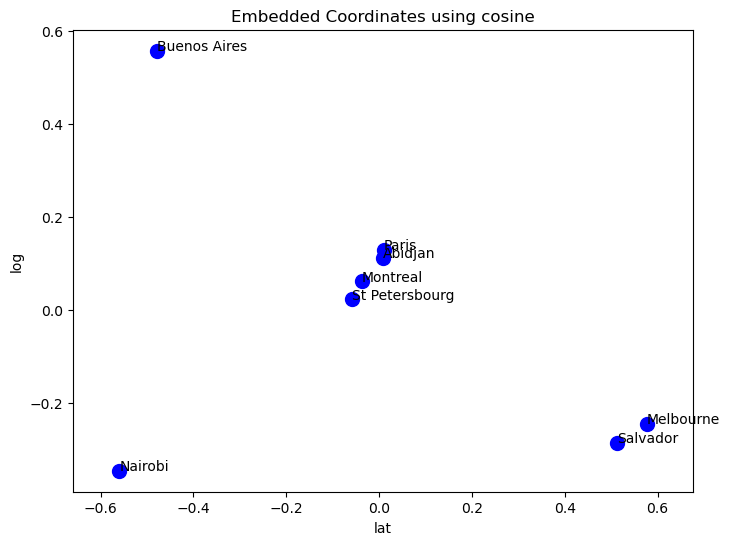

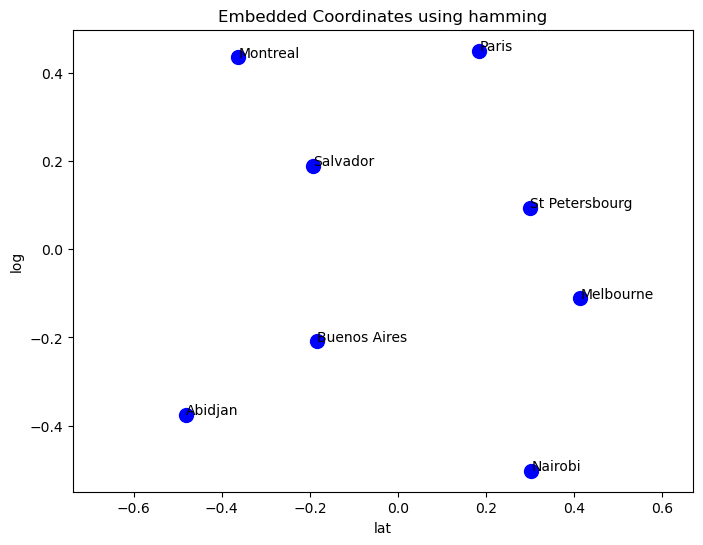

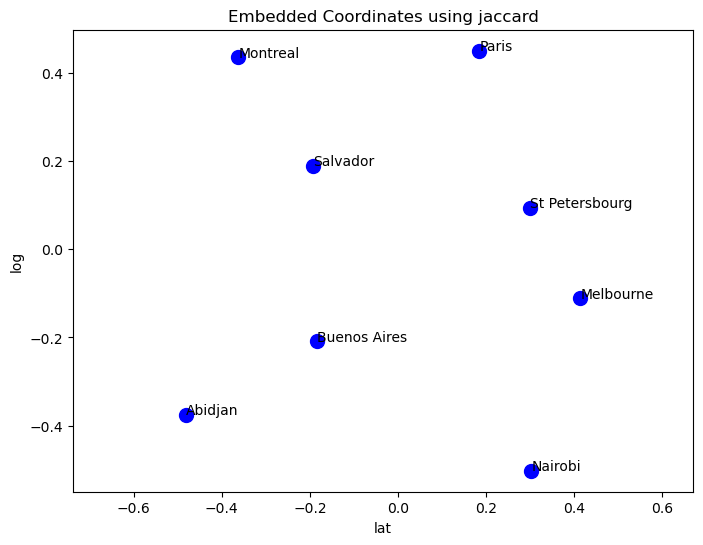

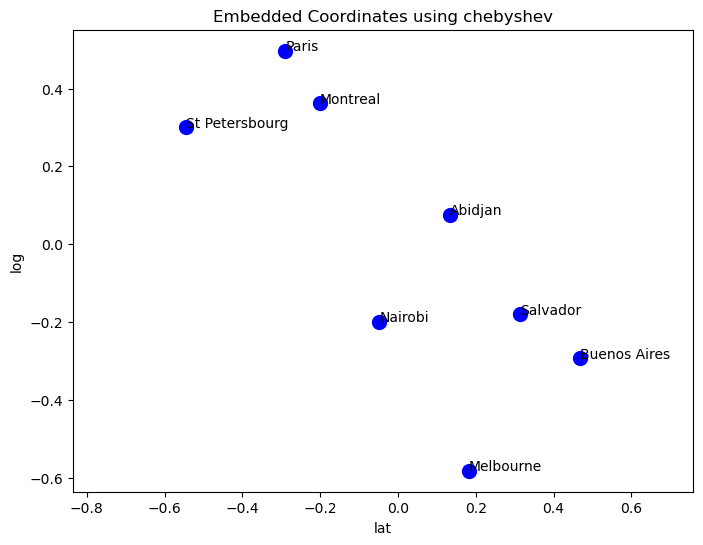

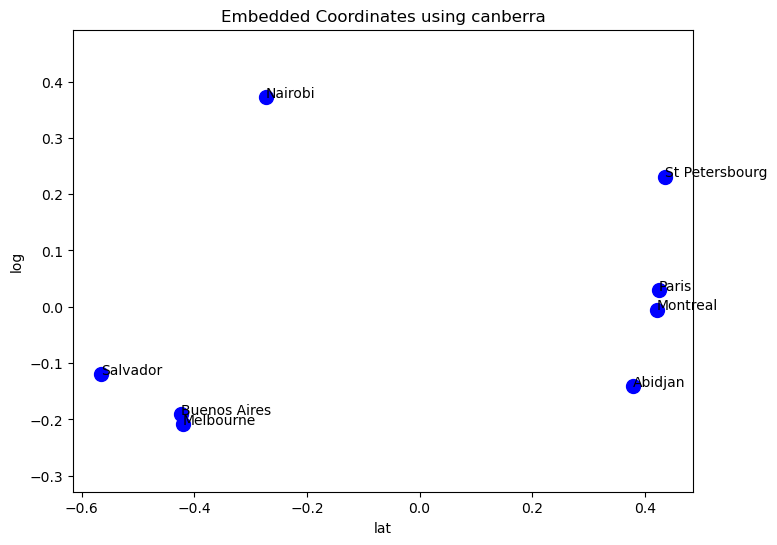

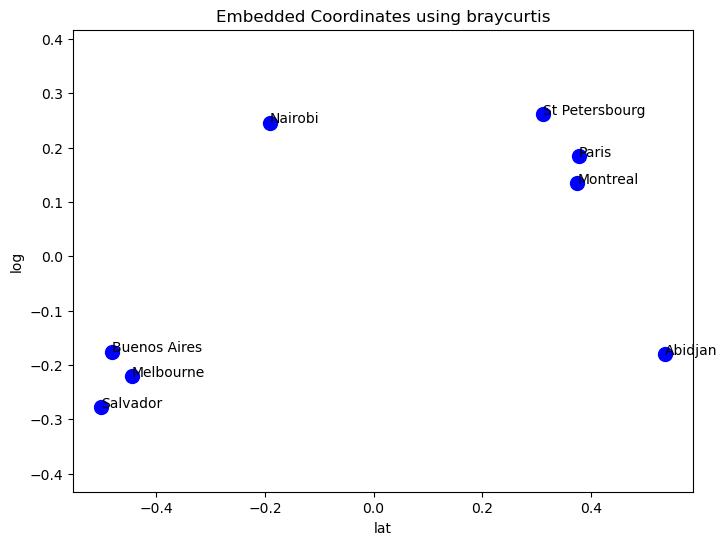

In [19]:
dist=['cosine','cityblock','seuclidean','sqeuclidean','cosine','hamming','jaccard','chebyshev','canberra','braycurtis']
plot_points(df,title='original dataset')
metric=False
for d in dist:

    distance=pd.DataFrame(squareform(pdist(df.iloc[:, 1:],metric=d)), columns=df.index, index=df.index)

    embedding =  MDS(dissimilarity='precomputed', random_state=0,n_components=2,metric=False)
    X_transformed = embedding.fit_transform(distance)
    df_t=pd.DataFrame(X_transformed , columns=df.columns, index=df.index)

    plot_points(df_t,title='Embedded Coordinates using '+d ,color='blue')

## Dimensionality Reduction with MDS


MDS can also be used for Dimensionality Reduction. We just need to set $d\_{ij}=||x_i-x_j||\ $, where the dimension of $x_i$ is greater than $z_j$. Consider the  digits dataset that consists of 8x8 pixel images of digits ranging from 0 to 9.


In [20]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape

We have 64 features or dimensions of $x_i$


In [21]:
print("samples:", n_samples, "features", n_features)

samples: 1083 features 64


We can plot out the different $x_i$  by converting them to a square array:


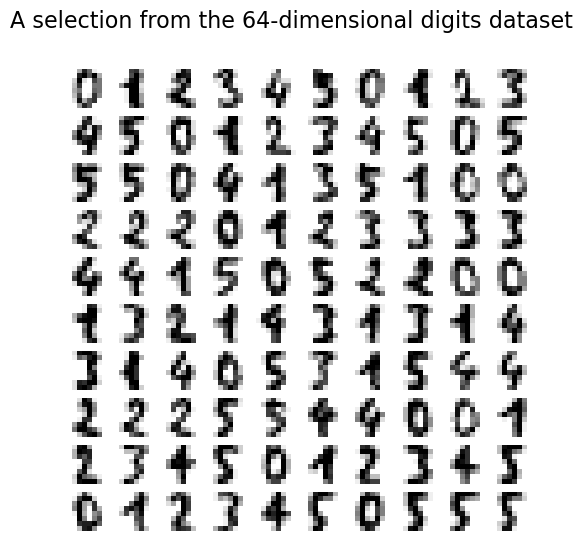

In [22]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

We create an embedding object. As we are using the features X,  we set dissimilarity to `euclidean`, which is the default choice for the `dissimilarity` parameter in **sklearn.manifold.MDS**.


In [23]:
embedding=MDS(n_components=2, n_init=1, max_iter=120, n_jobs=2)

We can apply MDS to the data X, we will fit the model and make a prediction simultaneously using the <code>fit_transform</code> method.


In [24]:
X_transformed=embedding.fit_transform(X)

We plot the samples in the embedding space and overlay images of the digit and the colour representing the digit. We see that although there is some overlap, each cluster corresponds to a different digit, this is despite the fact that the method is unsupervised.


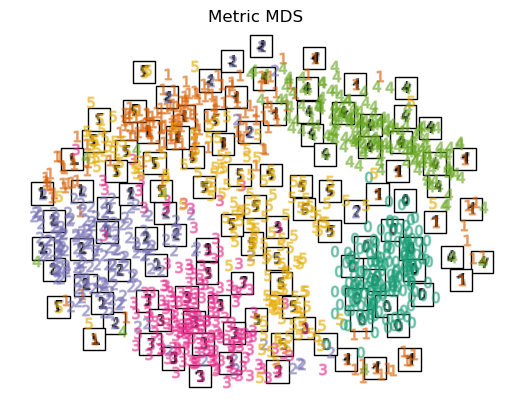

In [25]:
fig, ax = plt.subplots()
plot_embedding(X_transformed, "Metric MDS ", ax)
plt.show()

### Exercise 1


In this exercise, you will apply metric  MDS using different distance metrics in the list dist to the digit dataset X_norm that has been normalized.


cosine


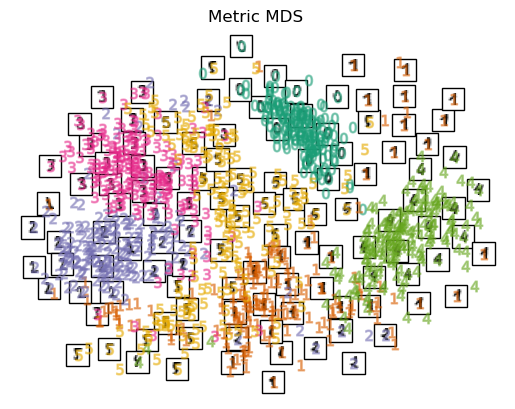

cityblock


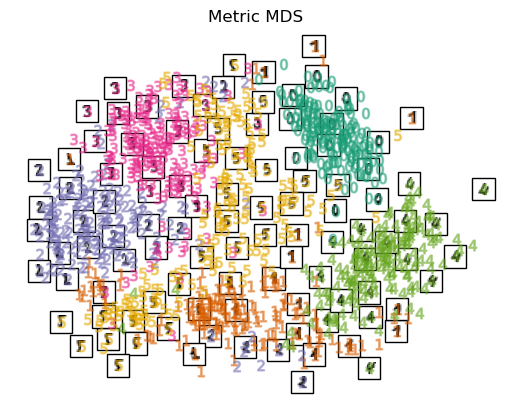

hamming


In [ ]:
dist=['cosine','cityblock','hamming','jaccard','chebyshev','canberra','braycurtis']
scaler = MinMaxScaler()
X_norm=scaler.fit_transform(X)

# your code starts here#
for d in dist:

    distance=squareform(pdist(X_norm,metric=d))
    print( d)

    embedding =  MDS(dissimilarity='precomputed', random_state=0,n_components=2)
    X_transformed = embedding.fit_transform(distance)
    fig, ax = plt.subplots()
    plot_embedding(X_transformed, "Metric MDS ", ax)
    plt.show()

<details>
    <summary>Click here for Solution</summary>

```python


for d in dist:

    distance=squareform(pdist(X_norm,metric=d))
    print( d)

    embedding =  MDS(dissimilarity='precomputed', random_state=0,n_components=2)
    X_transformed = embedding.fit_transform(distance)
    fig, ax = plt.subplots()
    plot_embedding(X_transformed, "Metric MDS ", ax)
    plt.show()
```

</details>


## T-Distributed Stochastic Neighbor Embedding (optional)


T-Distributed Stochastic Neighbor Embedding (TSNE) is a method for visualizing high-dimensional data. It usually works better than MDS for visualizing data. The method is based on probabilities, unlike MDS, you can't use the distances.


We apply the algorithm to the same dataset. As we see the setup is very similar.


In [ ]:
from sklearn.manifold import TSNE

In [ ]:
X_embedded = TSNE(n_components=2, init='random').fit_transform(X)

In [ ]:
fig, ax = plt.subplots()
plot_embedding(X_embedded , "test", ax)
plt.show()

## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


### Other Contributors


[Roxanne Li](https://www.linkedin.com/in/roxanne-li/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) is a Data Science intern at IBM Skills Network, entering level-5 study in the Mathematics & Statistics undergraduate Coop program at McMaster University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By           | Change Description          |
| ----------------- | ------- | -------------------- | --------------------------- |
| 2022-02-29        | 0.1     | Joseph Santarcangelo | Complete Exercises' content |
| 2022-05-20        | 0.1     | Roxanne Li           | Review and edit             |
